In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import required libraries
from util.plot_stream import PlotStream
import os

In [5]:
source_dir = "data/benchmark/ECG" # directory for source streams
drift_dir = "data/synthetic/n_drift/n_a60" # directory for drift stream
files = os.listdir(drift_dir)
files = [f for f in files if f.split('.')[-1] == "arff"]
files.sort()
files

['ECG_grad_p38_n100_b50.arff', 'ECG_grad_p38_n93_b50.arff']

In [114]:
filename = 'ECG_grad_p37_n96_b52'
s1 = PlotStream(source_dir, drift_dir, filename)

In [ ]:
s1.plot_all(66000,74000)

In [ ]:
s1.plot_drift(228000)

In [ ]:
s1.plot_anomaly_k(1)

In [ ]:
s1.plot_anomaly_k(3, 3000)

96


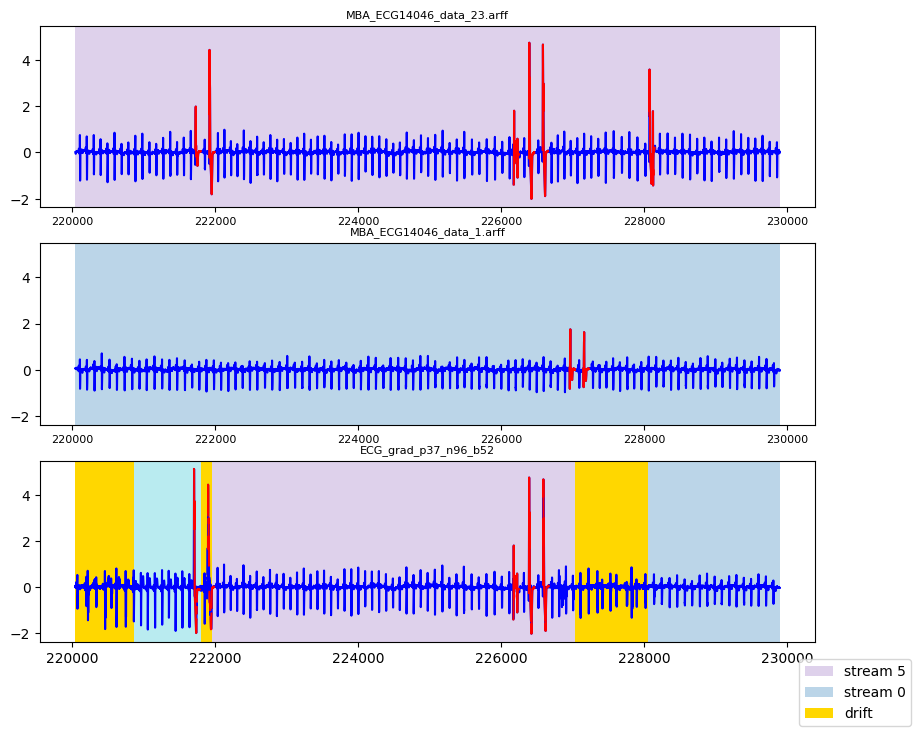

In [116]:
i = 96
print(i)
s1.plot_anomaly_k_with_source(i, 7500)

3


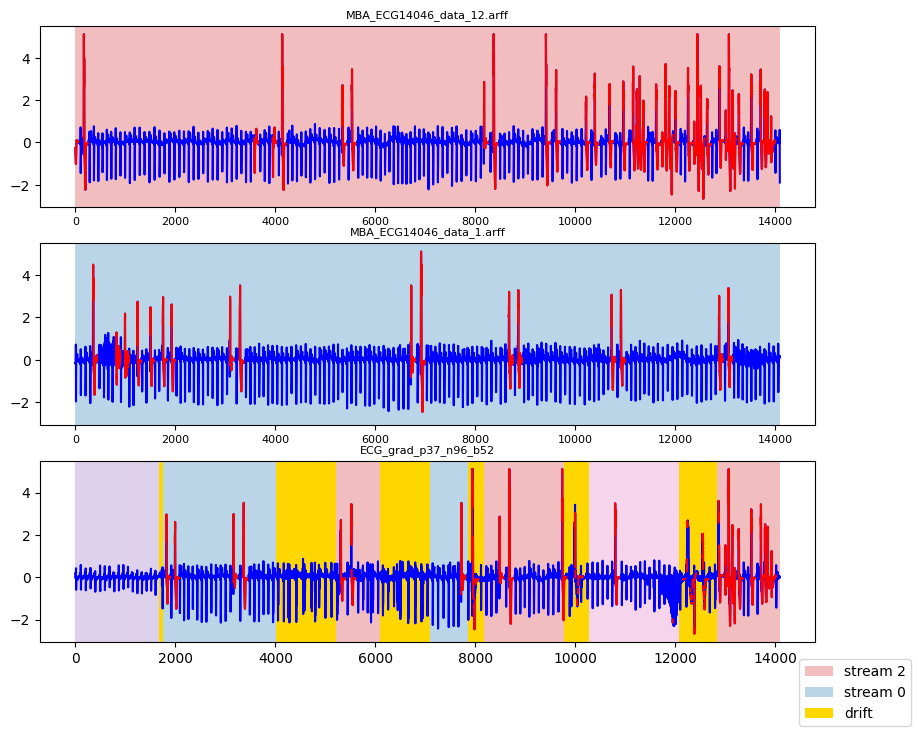

In [209]:
i -= 1
print(i)
s1.plot_anomaly_k_with_source(i, 7500)